# **Importing Libraries**

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms 
from torch.utils.data import DataLoader, sampler
import torch.nn as nn  
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
import copy
import cv2
from PIL import Image
import os
import random

# **Data Visualization**

In [172]:
USE_GPU = True

dtype = torch.float32 # we will be using float

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda


In [231]:
transform_train = transforms.Compose([transforms.ToTensor(),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
                                      transforms.Resize(size = (64,64)),
])    
transform_test = transforms.Compose([transforms.ToTensor(),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
                                     transforms.Resize(size = (64,64)),
])

In [232]:
Flowers102_train = torchvision.datasets.Flowers102(root = './data', split='train', download = True, transform = transform_train)
trainloader = DataLoader(Flowers102_train, batch_size=4, num_workers=2, shuffle=False)
Flowers102_val = torchvision.datasets.Flowers102(root = './data', split='train', download = True, transform = transform_test)
valloader = DataLoader(Flowers102_val, batch_size=4, num_workers=2, shuffle=False)
Flowers102_test = torchvision.datasets.Flowers102(root = './data', split='test', download = True, transform = transform_test)
testloader = DataLoader(Flowers102_test, batch_size=4, num_workers=2, shuffle=True)

In [233]:
print('Train set size:', len(Flowers102_train))
print('Validation set size:', len(Flowers102_val))
print('Test set size:', len(Flowers102_test))

Train set size: 1020
Validation set size: 1020
Test set size: 6149


In [234]:
print(len(trainloader))
print(len(testloader))

255
1538


In [235]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)

print(images[1].shape)
print(labels[1].item())

/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

torch.Size([4, 3, 64, 64])
torch.Size([3, 64, 64])
0


In [236]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [237]:
npimg = img.numpy()
print(npimg.shape)
npimg = np.transpose(npimg, (1,2,0))
print(npimg.shape)

(3, 64, 64)
(64, 64, 3)


In [238]:
batch_size = 4

In [239]:
def imshow(img, title):
  npimg = img.numpy() / 2 + 0.5
  plt.figure(figsize = (batch_size, 1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.title(title)
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


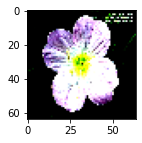

In [240]:
plt.figure(figsize = (2,2))
plt.imshow(npimg)
plt.show()

In [241]:
def show_batch_images(dataloader):
  images, labels = next(iter(dataloader))
  img = torchvision.utils.make_grid(images)
  imshow(img, title = [str(x.item()) for x in labels])

/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

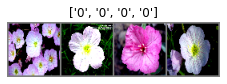

/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

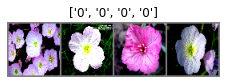

/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

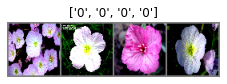

/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

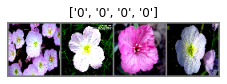

In [242]:
for i in range(4):
  show_batch_images(trainloader)

# **Data Preprocessing**

In [243]:
image_dims = (64, 64)
batch_size = 64

In [244]:
def imshow_masked(img):
  npimg = img.numpy()
  plt.figure(figsize = (3, 3))
  plt.axis('off')
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

In [295]:
class Dataset(torchvision.datasets.Flowers102):
  def __init__(self, path, image_dims = (64, 64), n_channels = 3, split='train'):
    super().__init__(path, split, download = True)
    self.n_classes = 102
    self.image_dims = image_dims
    self.n_channels = n_channels
    self.resize = transforms.Resize(image_dims)
    self.to_tensor = transforms.ToTensor()

  def __getitem__(self, index):
    image, label = super().__getitem__(index)

    Y_output = self.resize(image)
    X_input, X_mask = self.Create_Mask(Y_output)
    return self.to_tensor(X_input), self.to_tensor(X_mask), self.to_tensor(Y_output)

  def Create_Mask(self, image):
    image = np.asarray(image).copy()
    mask = np.ones((self.image_dims[0], self.image_dims[1], self.n_channels), dtype=np.uint8)

    # Determine the number of masked regions (1 or 2)
    num_regions = random.randint(1, 2)

    for _ in range(num_regions):
        # Randomly choose the size of the rectangle
        rect_width = random.randint(10, max(10, int(self.image_dims[0] * 0.3)))  # Min and max width of the rectangle
        rect_height = random.randint(10, max(10, int(self.image_dims[1] * 0.3)))  # Min and max height of the rectangle

        # Randomly choose the top left corner of the rectangle such that the entire rectangle is within the image dimensions
        x1 = random.randint(0, self.image_dims[0] - rect_width)
        y1 = random.randint(0, self.image_dims[1] - rect_height)

        # Bottom right corner is determined by adding width and height to the top left corner
        x2 = x1 + rect_width
        y2 = y1 + rect_height

        # Set the pixels within the rectangle to white on the original image
        image[y1:y2, x1:x2] = 255

        cv2.rectangle(mask, (x1, y1), (x2, y2), (255, 255, 255), thickness=-1)

    return image, mask


In [296]:
Trainset = Dataset('./data', image_dims)
Valset = Dataset('./data', image_dims, split='train')
Testset = Dataset('./data', image_dims, split='test')

In [297]:
Trainloader = DataLoader(Trainset, batch_size = batch_size, shuffle = True)
Valloader = DataLoader(Valset, batch_size = batch_size, shuffle = False)
Testloader = DataLoader(Testset, batch_size = batch_size, shuffle = False)

In [298]:
Train_dataiter = iter(Trainloader)
Val_dataiter = iter(Valloader)
Test_dataiter = iter(Testloader)

In [299]:
X_in, X_mask, Y_out = next(Train_dataiter)
print(X_in.shape, X_mask.shape, Y_out.shape)

torch.Size([64, 3, 64, 64]) torch.Size([64, 3, 64, 64]) torch.Size([64, 3, 64, 64])


Masked Image


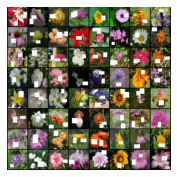

Masking Pattern


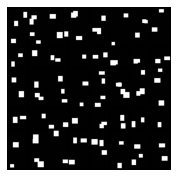

Original Image


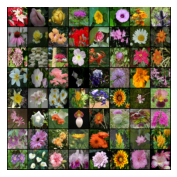

In [300]:
print('Masked Image')
imshow_masked(torchvision.utils.make_grid(X_in))
print('Masking Pattern')
imshow_masked(torchvision.utils.make_grid(X_mask))
print('Original Image')
imshow_masked(torchvision.utils.make_grid(Y_out))


# **Unet implementation**

In [301]:
# Convolutional block consisting of two consecutive convolution operations 
# followed by Batch Normalization and ReLU activation.
class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2
    This is used in both the encoder and 
    decoder to perform two consecutive convolutions."""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

In [302]:
# Part of the Encoder: reduces the spatial dimensions 
# with max pooling and then applies the DoubleConv block.
class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)

In [303]:
# Part of the Decoder: it upscales the feature maps and concatenates 
# the corresponding encoder feature map, followed by a DoubleConv block.
class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

In [304]:
class OutConv(nn.Module):
    """Output convolution. This is the final layer 
    that maps the features to the desired number of classes."""
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

In [305]:
vgg16 = models.vgg16(pretrained=True)
features = list(vgg16.features.children())

vgg16_features = nn.Sequential(*features[:24])

In [306]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=False):
        super(UNet, self).__init__()
        self.vgg16_features = vgg16_features
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear
        self.encoder = nn.Sequential(*list(vgg16_features.children())[:23])
        
        # Encoder starts here
        self.inc = (DoubleConv(n_channels, 64))
        self.down1 = (Down(64, 128))
        self.down2 = (Down(128, 256))
        self.down3 = (Down(256, 512))
        
        # Bottleneck
        factor = 2 if bilinear else 1
        self.down4 = (Down(512, 1024 // factor))

        # Decoder starts here
        self.up1 = (Up(1024, 512 // factor, bilinear))
        self.up2 = (Up(512, 256 // factor, bilinear))
        self.up3 = (Up(256, 128 // factor, bilinear))
        self.up4 = (Up(128, 64, bilinear))
        # final convolution after the decoder
        self.outc = (OutConv(64, n_classes))

    def forward(self, x):
        # Pass input through VGG16 layers
        x1 = self.vgg16_features[:4](x)  # Corresponds to first maxpool
        x2 = self.vgg16_features[4:9](x1)  # Corresponds to second maxpool
        x3 = self.vgg16_features[9:16](x2)  # Corresponds to third maxpool
        x4 = self.vgg16_features[16:23](x3)  # Corresponds to fourth maxpool
        x5 = self.vgg16_features[23:](x4)  # Rest of VGG16
        
        # Encoder: Contracting path
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        # Bottleneck
        x5 = self.down4(x4)
        # Decoder: Expanding path
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        # final layer
        logits = self.outc(x)
        return logits

    def use_checkpointing(self):
        self.inc = torch.utils.checkpoint(self.inc)
        self.down1 = torch.utils.checkpoint(self.down1)
        self.down2 = torch.utils.checkpoint(self.down2)
        self.down3 = torch.utils.checkpoint(self.down3)
        self.down4 = torch.utils.checkpoint(self.down4)
        self.up1 = torch.utils.checkpoint(self.up1)
        self.up2 = torch.utils.checkpoint(self.up2)
        self.up3 = torch.utils.checkpoint(self.up3)
        self.up4 = torch.utils.checkpoint(self.up4)
        self.outc = torch.utils.checkpoint(self.outc)

In [307]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0),
        )
        
    def forward(self, img):
        validity = self.model(img)
        return validity


# **Training Process**

In [308]:
model_unet = UNet(n_channels=3, n_classes=3, bilinear=False).to(device)
discriminator = Discriminator().to(device)

In [309]:
# Define L2 loss and adversarial loss
l2_loss = nn.MSELoss().to(device)
adversarial_loss = nn.BCEWithLogitsLoss().to(device)

# Define optimizers
optimizer_unet = torch.optim.Adam(model_unet.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

Epoch [1/50], Step [1/16], D Loss: 0.7797, G Loss: 0.7573
New min loss at epoch 1: 2.89004
Epoch [2/50], Step [1/16], D Loss: 1.5117, G Loss: 1.5851
New min loss at epoch 2: 1.57210
Epoch [3/50], Step [1/16], D Loss: 0.8049, G Loss: 1.0308
New min loss at epoch 3: 0.93190
Epoch [4/50], Step [1/16], D Loss: 0.7553, G Loss: 0.8994
New min loss at epoch 4: 0.86379
Epoch [5/50], Step [1/16], D Loss: 0.7439, G Loss: 0.8519
New min loss at epoch 5: 0.82559
Epoch [6/50], Step [1/16], D Loss: 0.7457, G Loss: 0.7931
New min loss at epoch 6: 0.80389
Epoch [7/50], Step [1/16], D Loss: 0.7260, G Loss: 0.7713
New min loss at epoch 7: 0.80296
Epoch [8/50], Step [1/16], D Loss: 0.7186, G Loss: 0.7925
New min loss at epoch 8: 0.80263
Epoch [9/50], Step [1/16], D Loss: 0.7141, G Loss: 0.8327
Epoch [10/50], Step [1/16], D Loss: 0.7029, G Loss: 0.8450
Epoch [11/50], Step [1/16], D Loss: 0.6925, G Loss: 0.8651
Epoch [12/50], Step [1/16], D Loss: 0.6866, G Loss: 0.8502
Epoch [13/50], Step [1/16], D Loss: 0

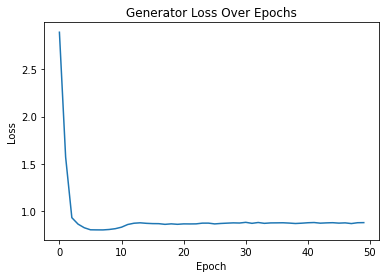

CPU times: user 3min 42s, sys: 58.8 s, total: 4min 41s
Wall time: 4min 44s


In [310]:
%%time
loss_epoch_arr = []
max_epochs = 50

min_loss = 1000

# n_iters = np.ceil(len(Trainloader)/batch_size)
for epoch in range(max_epochs):
    epoch_loss = 0.0
    model_unet.train()
    discriminator.train()                              
    for i, (inputs, masks, _) in enumerate(Trainloader, 0):
        inputs, masks = inputs.to(device), masks.to(device)
        
        ### Train Discriminator
        optimizer_D.zero_grad()

        # Real loss
        real_imgs = inputs
        real_validity = discriminator(real_imgs)
        real_loss = adversarial_loss(real_validity, torch.ones_like(real_validity))
        
        # Fake loss
        fake_imgs = model_unet(inputs).detach()  # Detach to avoid training generator now
        fake_validity = discriminator(fake_imgs)
        fake_loss = adversarial_loss(fake_validity, torch.zeros_like(fake_validity))
        
        # Total discriminator loss
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        ### Train Generator (U-Net)
        optimizer_unet.zero_grad()
        # Generate a batch of images
        gen_imgs = model_unet(inputs)
        # Loss measures generator's ability to fool the discriminator
        validity = discriminator(gen_imgs)
        g_adv_loss = adversarial_loss(validity, torch.ones_like(validity))
        g_l2_loss = l2_loss(gen_imgs, masks)
        g_loss = g_adv_loss + g_l2_loss
       
        g_loss.backward()
        optimizer_unet.step()

        epoch_loss += g_loss.item() * inputs.size(0)  # Assuming g_loss is per batch
        
        # Logging
        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{max_epochs}], Step [{i+1}/{len(Trainloader)}], '
                  f'D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')
        
    epoch_loss /= len(Trainloader.dataset)  # Convert total loss to average loss per epoch
    loss_epoch_arr.append(epoch_loss)
    
    if epoch_loss < min_loss:
        min_loss = epoch_loss
        best_model = copy.deepcopy(model_unet.state_dict())
        print(f'New min loss at epoch {epoch+1}: {min_loss:.5f}')
        torch.save(best_model, 'best_unet_model.pth')

plt.plot(loss_epoch_arr)
plt.title('Generator Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [311]:
model_unet.load_state_dict(best_model)

<All keys matched successfully>

In [312]:
print(model_unet)

UNet(
  (vgg16_features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

In [313]:
torch.save(model_unet.state_dict(), './model.pt')

In [314]:
weight_layer0 = list(model_unet.parameters())[0].cpu()
weight_layer0 = weight_layer0.data.numpy()

In [315]:
print(weight_layer0.shape)

(64, 3, 3, 3)


[]

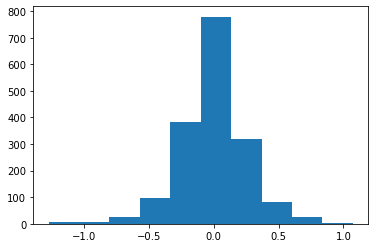

In [316]:
plt.hist(weight_layer0.ravel())
plt.plot()

torch.Size([64, 3, 64, 64])
torch.Size([64, 3, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


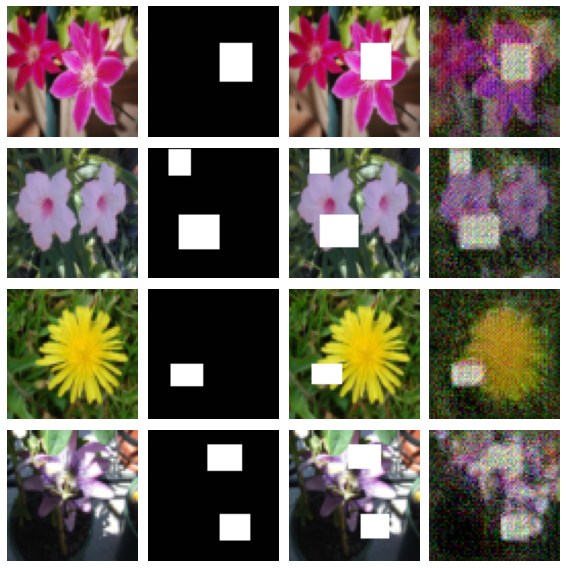

In [317]:
sample_inputs, sample_masks, sample_truths = next(Train_dataiter)
sample_inputs = sample_inputs.cuda()

model_unet.eval()
with torch.no_grad():
    sample_preds = model_unet(sample_inputs)
    print(sample_inputs.size())
    print(sample_preds.size())

sample_inputs = sample_inputs.cpu()
sample_preds = sample_preds.cpu()
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
# for i in range(4):
#     # Ground Truth Image
#     axs[i][0].imshow(np.transpose(sample_truths[i].numpy(), (1, 2, 0)))
#     # Ground Truth Mask
#     axs[i][1].imshow(sample_masks[i].squeeze(), cmap='gray')
#     # Input Image
#     axs[i][2].imshow(np.transpose(sample_inputs[i].numpy(),(1, 2, 0)))
#     # Predicted Mask
#     axs[i][3].imshow(sample_preds[i].squeeze(), cmap='gray')

for i in range(4):
    axs[i][0].imshow(np.transpose(sample_truths[i], (1, 2, 0)))
    axs[i][1].imshow(np.transpose(sample_masks[i], (1, 2, 0)), cmap='gray')
    axs[i][2].imshow(np.transpose(sample_inputs[i],(1, 2, 0)))
    axs[i][3].imshow(np.transpose(sample_preds[i].cpu(), (1, 2, 0)), cmap='gray')
for ax in axs.flat:
    ax.axis('off')

fig.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


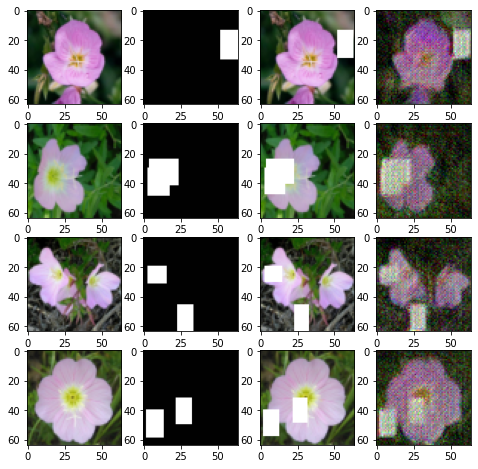

In [318]:
sample_inputs, sample_masks, sample_truths = next(Test_dataiter)
sample_inputs = sample_inputs.cuda()

model_unet.eval()
with torch.no_grad():
    sample_preds = model_unet(sample_inputs)

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))

sample_inputs, sample_masks = sample_inputs.cpu(), sample_masks.cpu()
for i in range(4):
    axs[i][0].imshow(np.transpose(sample_truths[i], (1, 2, 0)))
    axs[i][1].imshow(np.transpose(sample_masks[i], (1, 2, 0)), cmap='gray')
    axs[i][2].imshow(np.transpose(sample_inputs[i],(1, 2, 0)))
    axs[i][3].imshow(np.transpose(sample_preds[i].cpu(), (1, 2, 0)), cmap='gray')

In [42]:
# Call this to download the model weights
"""
model = InpaintingModel()
model.load_state_dict(torch.load('./model.pt'))
model.eval()
"""

"\nmodel = InpaintingModel()\nmodel.load_state_dict(torch.load('./model.pt'))\nmodel.eval()\n"